In [1]:
import an_specific_utilities as ut
from mypy_ai_utils import *

# import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
with open("DY_PU200.pkl", "rb") as fsigpklfile:
    fsig = pickle.load(fsigpklfile)
with open("MinBias.pkl", "rb") as fbkgpklfile:
    fbkg = pickle.load(fbkgpklfile)

In [3]:
ebspt = fsig["TkEleL2_EB_MCH_pt"]
ebsiso = fsig["TkEleL2_EB_MCH_tkIso"]
ebspiso = fsig["TkEleL2_EB_MCH_puppiIso"]
ebspreiso = fsig["TkEleL2_EB_MCH_reiso_dRmin0_01_tot_puppiIso"]
ebbpt = fbkg["TkEleL2_EB_pt"]
ebbiso = fbkg["TkEleL2_EB_tkIso"]
ebbpiso = fbkg["TkEleL2_EB_puppiIso"]
ebbpreiso = fbkg["TkEleL2_EB_reiso_dRmin0_01_tot_puppiIso"]
print(ebspt.shape, ebsiso.shape, ebspiso.shape, ebspreiso.shape, ebbpt.shape, ebbiso.shape, ebbpiso.shape, ebbpreiso.shape)

eespt = fsig["TkEleL2_EE_MCH_pt"]
eesiso = fsig["TkEleL2_EE_MCH_tkIso"]
eespiso = fsig["TkEleL2_EE_MCH_puppiIso"]
eespreiso = fsig["TkEleL2_EE_MCH_reiso_dRmin0_01_tot_puppiIso"]
eebpt = fbkg["TkEleL2_EE_pt"]
eebiso = fbkg["TkEleL2_EE_tkIso"]
eebpiso = fbkg["TkEleL2_EE_puppiIso"]
eebpreiso = fbkg["TkEleL2_EE_reiso_dRmin0_01_tot_puppiIso"]
print(eespt.shape, eesiso.shape, eespiso.shape, eespreiso.shape, eebpt.shape, eebiso.shape, eebpiso.shape, eebpreiso.shape)

ebsi = np.concatenate(ebsiso)
ebspi = np.concatenate(ebspiso)
ebsprei = np.concatenate(ebspreiso)
ebbi = np.concatenate(ebbiso)
ebbpi = np.concatenate(ebbpiso)
ebbprei = np.concatenate(ebbpreiso)
print(ebsi.shape, ebspi.shape, ebsprei.shape, ebbi.shape, ebbpi.shape, ebbprei.shape)

eesi = np.concatenate(eesiso)
eespi = np.concatenate(eespiso)
eesprei = np.concatenate(eespreiso)
eebi = np.concatenate(eebiso)
eebpi = np.concatenate(eebpiso)
eebprei = np.concatenate(eebpreiso)
print(eesi.shape, eespi.shape, eesprei.shape, eebi.shape, eebpi.shape, eebprei.shape)

(164146,) (164146,) (164146,) (164146,) (919809,) (919809,) (919809,) (919809,)
(98530,) (98530,) (98530,) (98530,) (280671,) (280671,) (280671,) (280671,)
(216410,) (216410,) (216410,) (6469199,) (6469199,) (6469199,)
(108722,) (108722,) (108722,) (340861,) (340861,) (340861,)


In [4]:
make_roc([[ebsi, ebbi, 'tkIso'], [ebspi, ebbpi, 'puppiIso'], [ebsprei, ebbprei, 'RePuppiIso']], filename="TkEleL2_EB_tkIso_ROC.png", scale="piecewise_linear", s=5)
make_roc([[eesi, eebi, 'tkIso'], [eespi, eebpi, 'puppiIso'], [eesprei, eebprei, 'RePuppiIso']], filename="TkEleL2_EE_tkIso_ROC.png", scale="piecewise_linear", s=5)

make_roc([[ebsi, ebbi, 'tkIso'], [ebspi, ebbpi, 'puppiIso'], [ebsprei, ebbprei, 'RePuppiIso']], filename="TkEleL2_EB_tkIso_ROC_linear.png", xlim=(0.5, 1.05), ylim=(0.45, 1.05), s=5)
make_roc([[eesi, eebi, 'tkIso'], [eespi, eebpi, 'puppiIso'], [eesprei, eebprei, 'RePuppiIso']], filename="TkEleL2_EE_tkIso_ROC_linear.png", xlim=(0.45, 1.05), ylim=(0.45, 1.05), s=5)

AUC: -0.0024
AUC: 0.0599
AUC: -0.0595
Saving ROC curve to TkEleL2_EB_tkIso_ROC.png...
ROC curve saved to TkEleL2_EB_tkIso_ROC.png

##############################
Execution time of function make_roc: 2.493677 seconds
AUC: -0.1129
AUC: -0.0430
AUC: 0.0659
Saving ROC curve to TkEleL2_EE_tkIso_ROC.png...
ROC curve saved to TkEleL2_EE_tkIso_ROC.png

##############################
Execution time of function make_roc: 0.462602 seconds
AUC: 0.0533
AUC: 0.0408
AUC: -0.1843
Saving ROC curve to TkEleL2_EB_tkIso_ROC_linear.png...
ROC curve saved to TkEleL2_EB_tkIso_ROC_linear.png

##############################
Execution time of function make_roc: 2.328697 seconds
AUC: -0.1638
AUC: 0.0260
AUC: 0.4009
Saving ROC curve to TkEleL2_EE_tkIso_ROC_linear.png...
ROC curve saved to TkEleL2_EE_tkIso_ROC_linear.png

##############################
Execution time of function make_roc: 0.421087 seconds


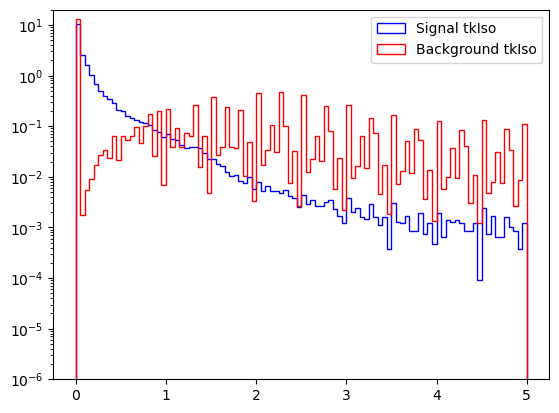

In [5]:
plt.hist(ebsprei, bins=100, range=(0, 5), density=True, histtype='step', label='Signal tkIso', color='blue')
plt.hist(ebbprei, bins=100, range=(0, 5), density=True, histtype='step', label='Background tkIso', color='red')
plt.yscale('log')
plt.ylim(1e-6, 20)
plt.legend()
plt.show()

In [ ]:
roc_res = make_roc_per_event([[ebsiso, ebbiso, 'tkIso'], [ebspiso, ebbpiso, 'puppiIso'], [ebspreiso, ebbpreiso, 'RePuppiIso']],
                             thrvs = np.arange(0, 10, 0.0125))

tkIso
Execution time: 16.319085121154785 seconds
Execution time: 72.43694067001343 seconds

##############################
Execution time of function make_roc_per_event: 88.757327 seconds


In [8]:
def make_roc_per_event_png(roc_res, *,
                           filename: str = "roc_curve.png",
                           scale: str = "default",
                           xlim: tuple[float] = (0.1, 1.1), ylim: tuple[float] = (0.1, 1.1), **kwargs):


    markers = ['o', '*', 'v', '^']
    cmaps = ['viridis', 'plasma', 'inferno', 'coolwarm']

    # Plot ROC curves
    print(f"Saving ROC curve to {filename}...")
    plt.figure(figsize=(8, 6))
    for i, (fpr, tpr, thr, sample) in enumerate(roc_res):
        print(fpr[1])
        scatter = plt.scatter(fpr, tpr,
                                c=thr, cmap = cmaps[i], norm='log', # Colour maps can slow larger arrays
                                marker=markers[i],
                            #   label=f'{vals[i][2]} (AUC = {auc:.4f})', **kwargs)
                                label=sample, **kwargs)
        cbar = plt.colorbar(scatter)

    if scale == "piecewise_linear":
        # Adjust plotting to show 0.1 to 0.9 and 0.9 to 0.99 and 0.99 to 1.0 and 1.0 to 1.1 regions clearly
        # Optional: vertical guides at the two boundaries for clarity
        plt.xscale('piecewise_0p1_0p9_0p999')
        plt.yscale('piecewise_0p1_0p9_0p999')
        plt.xlim(xlim[0], xlim[1])
        plt.ylim(ylim[0], ylim[1])
        for v in [0.9, 0.99, 1.0]:
            plt.axvline(v, color='0.7', lw=1, ls='--')
    else:
        plt.xlim(left=xlim[0], right=xlim[1])
        plt.ylim(bottom=ylim[0], top=ylim[1])

    plt.grid(True, which='both', ls='--', alpha=0.4)

    plt.xlabel('False Positive Rate (log scale)')
    plt.ylabel('True Positive Rate (log scale)')
    plt.title('ROC Curve')

    plt.legend(loc='lower right')
    plt.savefig(filename, dpi=300)
    print(f"ROC curve saved to {filename}")
    plt.close()

In [9]:
make_roc_per_event_png(roc_res, filename="TkEleL2_EB_tkIso_ROCperevent_linear.png", xlim=(0.99, 1.001), ylim=(0.9, 1.01), s=5)

Saving ROC curve to TkEleL2_EB_tkIso_ROCperevent_linear.png...
0.9956338761634209
ROC curve saved to TkEleL2_EB_tkIso_ROCperevent_linear.png


In [18]:
len(roc_res[0][0])

80